## Edge detection

**El proposito de este libro es probar la deteccion de ejes. Detectando los ejes, se puede identificar la base y cada uno de los palos del hanoi. Es importante esto porque entoces se pueden sacar 3 ROIs para disgregar por colores los anillos y generar las variables para que el algoritmo sea resuelto**

***

Los codigos probados para edge detection en este notebooks son:

*  Canny
*  Sobel
*  Hough

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#basic variables
img_quant = 23 + 1

hanoi_dict = {} #dictionary used to store the images
hanoi_blur_dict = {} #dictionary used to store the blurred gray images. this is the input for the hough transform
hanoi_hough_dict = {}  # dictionary that stores the hough circle detection. it is a copi of the hanoi dictionary, but with circles



In [32]:
#function that display a unique image
def display(img, cmap='gray'):
    fig = plt.figure(figsize = (5,6))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [33]:
#function that display the set of collected images in color
def display_allcolor(dictionary):
    # create figure
    fig = plt.figure(figsize=(15, 18))
    
    #size of the bic picture
    rows = 6
    columns = 4
    
    for i in range (1, img_quant):
        fig.add_subplot(rows, columns, i)
        plt.imshow(cv2.cvtColor(dictionary[str('hanoi'+str(i))], cv2.COLOR_BGR2RGB))
      
    
    

In [34]:
#function that display the set of images after blur effect and grayscale
def display_allblur(dictionary):
    # create figure
    fig = plt.figure(figsize=(15, 18))
    
    #size of the bic picture
    rows = 6
    columns = 4
    
    for i in range (1, img_quant):
        fig.add_subplot(rows, columns, i)
        plt.imshow(dictionary[str('hanoi'+str(i))], cmap = 'gray')

In [41]:
def hough_ellipses(dictionary):  #the input should be the blur set of images
    
    for n in range (1, img_quant):
    
        rows = dictionary[str('hanoi'+str(n))].shape[0]
        hanoi_blur = dictionary[str('hanoi'+str(n))]  #fetch the blurred image from the dictionary one by one
    
    
#pruebas: original con param1 80 y param2 25, minrad 10 maxrad 30
        circles = cv2.HoughCircles(hanoi_blur, cv2.HOUGH_GRADIENT, 1, rows/16,
                               param1=40, param2=20,
                               minRadius=10, maxRadius=35)
        
        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                center = (i[0], i[1])
                # circle center
                cv2.circle(hanoi_hough_dict[str('hanoi'+str(n))], center, 1, (0, 100, 100), 1)
                # circle outline
                radius = i[2]
                cv2.circle(hanoi_hough_dict[str('hanoi'+str(n))], center, radius, (255, 0, 255), 1)

         
#cv2.imshow('detected circles', hanoi)
#cv2.waitKey(0)
    

In [35]:


# load the dictionary with the jpg dataset stored at DATA
for i in range (1, img_quant):

    name_file = 'DATA/ROI_select' + str(i) + '.jpg'
    name_var = str('hanoi'+str(i))
    
    hanoi_dict[name_var] = cv2.imread(name_file)

hanoi_hough_dict =  hanoi_dict.copy()  # create a copy of hanoi to be displayed with hough circles
#print(hanoi)
    


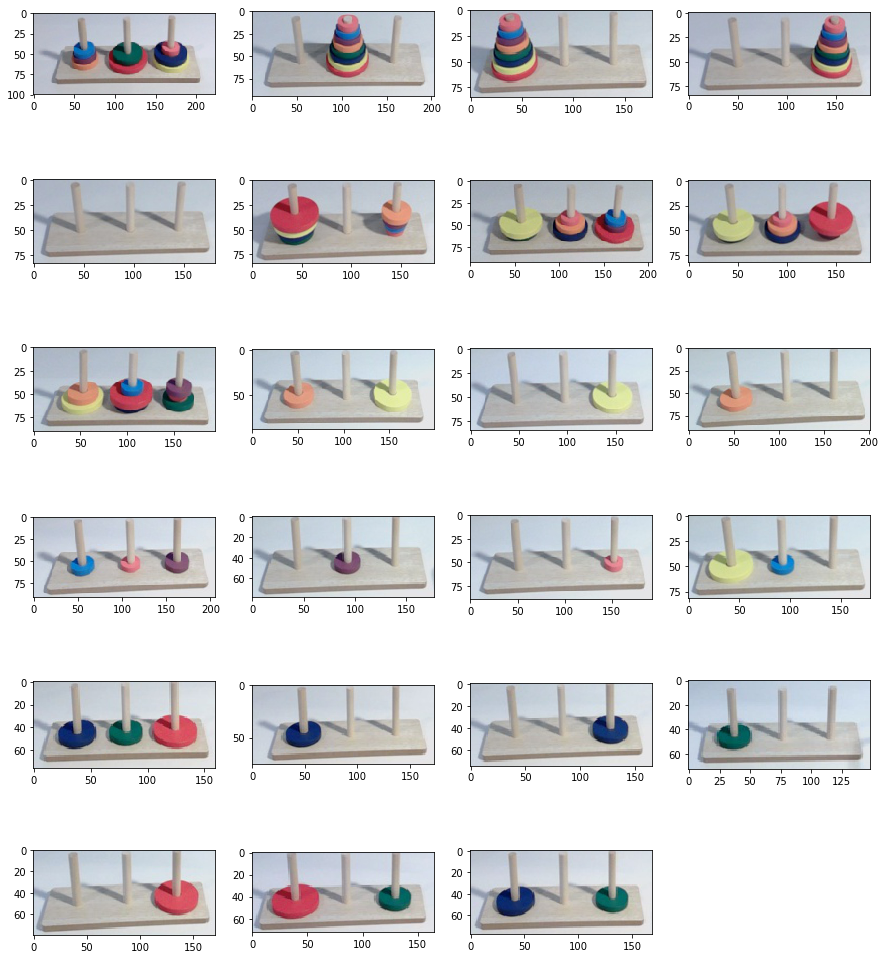

In [36]:
display_allcolor(hanoi_dict)

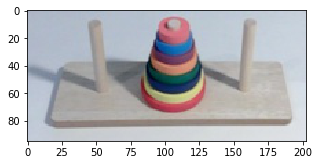

In [8]:
   
    
  #  hanoi_color = cv2.cvtColor(hanoi['hanoi2'], cv2.COLOR_BGR2RGB)
   # display(hanoi_color)

In [15]:
#hanoi_blur  =cv2.blur(hanoi, ksize = (5,5))
#hanoi_blur = cv2.cvtColor(hanoi, cv2.COLOR_BGR2GRAY)
#hanoi_blur = cv2.GaussianBlur(hanoi_blur, (1,1) , sigmaX=0, sigmaY=0) 
#display(hanoi_blur)


In [37]:

#this is for blurring the set of images
for i in range (1, img_quant):
    hanoi_blur = cv2.cvtColor(hanoi[str('hanoi' + str(i))], cv2.COLOR_BGR2GRAY)
    hanoi_blur_dict[str('hanoi' + str(i))] = cv2.GaussianBlur(hanoi_blur, (1,1) , sigmaX=0, sigmaY=0)  #here the gaussian blur filtered is applied. with 1x1 kernel, now is not relevant


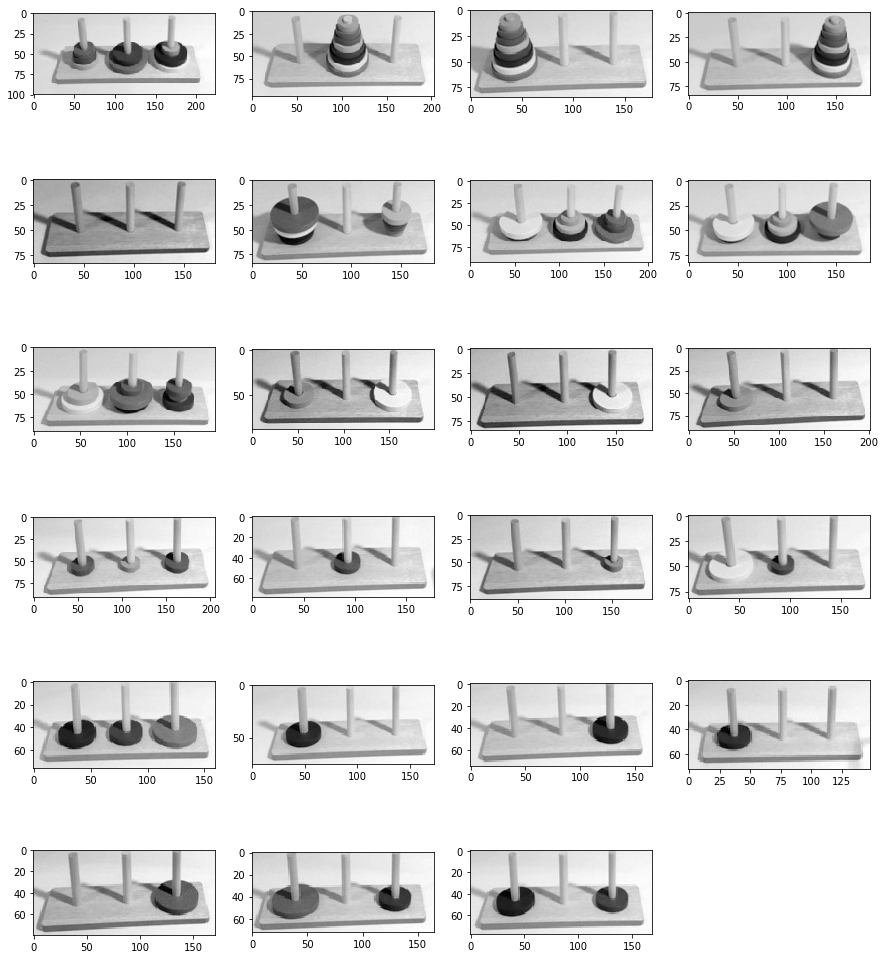

In [38]:
display_allblur (hanoi_blur_dict)

In [42]:
hough_ellipses(hanoi_blur_dict)

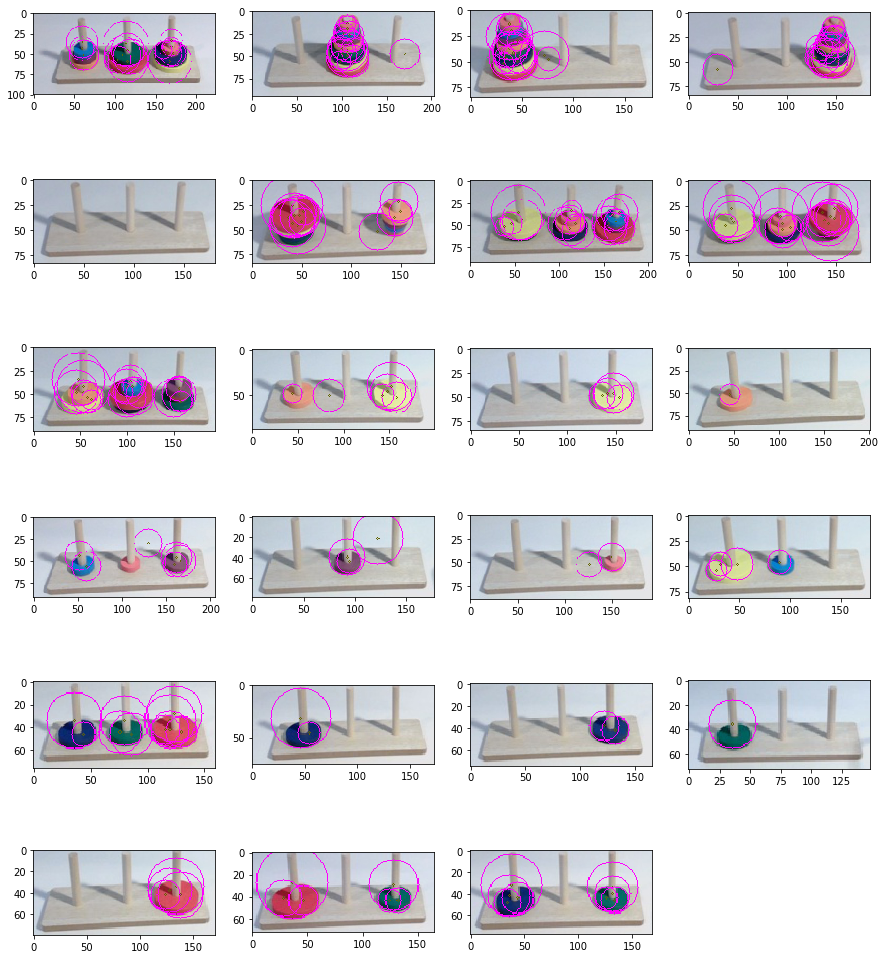

In [43]:
display_allcolor(hanoi_hough_dict)

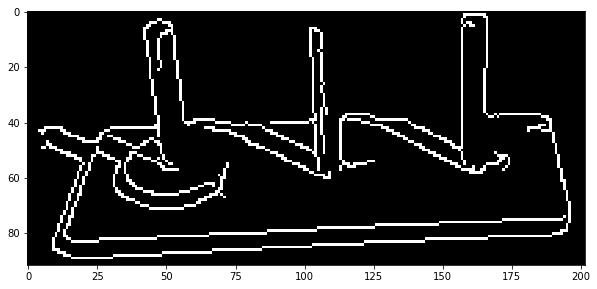

In [24]:
med_val = np.median(hanoi_blur)
#med_val
lower = int(max(0 , 0.1*med_val))
upper = int(min(255 , 1.5*med_val))
edges = cv2.Canny(image = hanoi_blur, threshold1 = lower, threshold2 = upper )
display(edges)

In [95]:
sobelx = cv2.Sobel(src=hanoi_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=1) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=hanoi_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=1) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=hanoi_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=1) # Combined X and Y Sobel Edge Detection

In [96]:
#display(sobelx)

In [97]:
#display(sobely)

In [98]:
#display(sobelxy)

In [35]:
rows = hanoi_blur.shape[0]

#pruebas: original con param1 80 y param2 25, minrad 10 maxrad 30


circles = cv2.HoughCircles(hanoi_blur, cv2.HOUGH_GRADIENT, 1, rows/16,
                               param1=40, param2=20,
                               minRadius=10, maxRadius=35)
    
    
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(hanoi, center, 1, (0, 100, 100), 1)
        # circle outline
        radius = i[2]
        cv2.circle(hanoi, center, radius, (255, 0, 255), 1)
    
    
cv2.imshow('detected circles', hanoi)
cv2.waitKey(0)
    

32

In [36]:
cv2.destroyAllWindows()


In [29]:
circles

array([[[114,  44,  32],
        [172,  50,  17],
        [120,  54,  22],
        [112,  50,  21],
        [ 60,  46,  24],
        [ 64,  52,  17],
        [172,  58,  17],
        [162,  50,  14],
        [170,  40,  14]]], dtype=uint16)

In [30]:
circles.shape


(1, 9, 3)